## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

other_installment_plansВы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
# your code here
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv'
data = pd.read_csv(url)
print(data.shape)
print(data["number_credits"].unique())
data

(1000, 21)
['1' '2-3' '4-5' '>= 6']


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
if (data.isnull().any().any()):
  print("Yes")
else:
  print("No")

# Количественные признаки: duration, amount, age.
# Бинарные признаки: telephone, foreign_worker, credit_risk.
# Категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job.
# Порядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable.

No


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby(["purpose"]).mean()["amount"]

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
df = data.loc[data["age"] < 30]
dt = data.loc[data["age"] > 40]
ds = df.loc[df["housing"] == "rent"]
dq = dt.loc[dt["housing"] == "rent"]
print("Percentage of < 30 renting is ", ds.size / df.size)
print("Percentage of > 40 renting is ", dq.size / dt.size)

Percentage of < 30 renting is  0.6666666666666666
Percentage of > 40 renting is  0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
df = data.loc[data["foreign_worker"] == "yes"]["number_credits"].isin(['4-5', '>= 6'])
df[df == True].size

1

### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

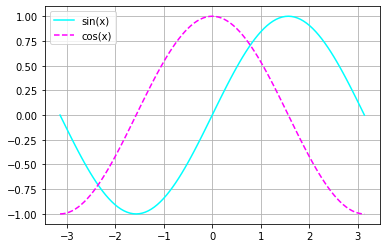

In [ ]:
x = np.linspace(-np.pi, np.pi, 101)
y = np.sin(x)
fig = plt.figure()
ax_1 = fig.add_subplot(1, 1, 1)
ax_1.plot(x, y, color = "#00ffff", label = "sin(x)")
y_cos = np.cos(x)
ax_1.plot(x, y_cos, color = "#ff00ff", linestyle = "dashed", label = "cos(x)")
ax_1.grid()
ax_1.legend()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [ ]:
df = data.loc[data["credit_risk"] == "good"]
dt = df["status"]

ds = data.loc[data["credit_risk"] == "bad"]
dq = ds["status"]
dq.value_counts(sort = False)

... < 0 DM                                    105
no checking account                           135
... >= 200 DM / salary for at least 1 year     46
0<= ... < 200 DM                               14
Name: status, dtype: int64

Text(0.5, 1.0, 'Bad Risk')

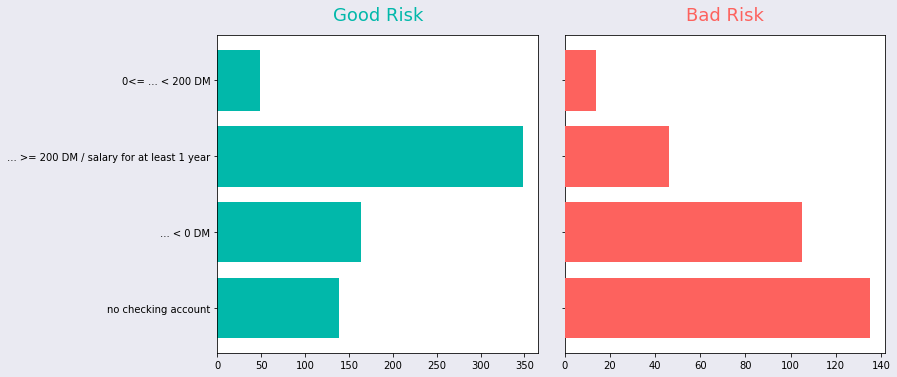

In [ ]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = dt.unique()
column0 = dt.value_counts(sort = False)
column1 = dq.value_counts(sort = False)
title0 = 'Good Risk'
title1 = 'Bad Risk'
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

array = []
ok = []

for x in column0.items():
  array.append([x[0], 0])

for x in column1.items():
  for y in array:
    if y[0] == x[0]:
      y[1] = x[1]

for x in array:
  ok.append(x[1])

axes[0].barh(index, column0, align='center', color=color_blue)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_blue, **hfont)
axes[1].barh(index, ok, align='center', color=color_red, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_red, **hfont)


### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

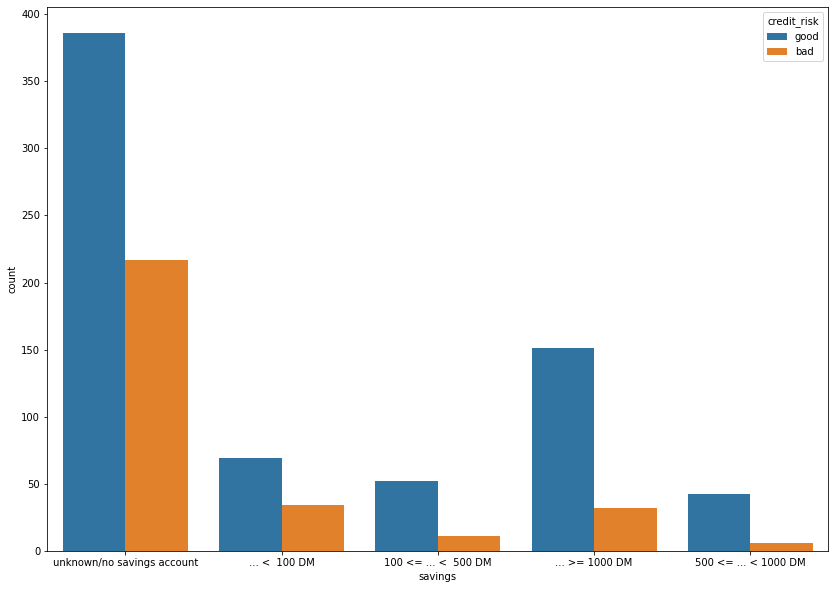

In [ ]:
sns.countplot(x = x, hue = "credit_risk", data=data)

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

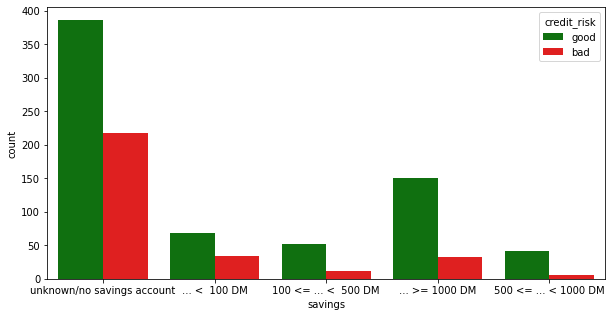

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

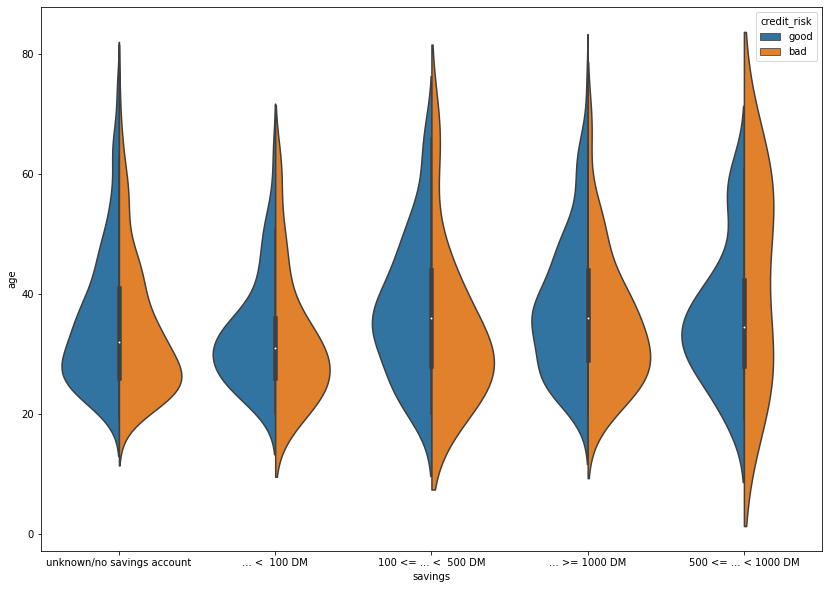

In [ ]:
plt.rcParams['figure.figsize']=(14,10) 
sns.violinplot(x = "savings", y = "age", hue = "credit_risk", split=True, data = data)

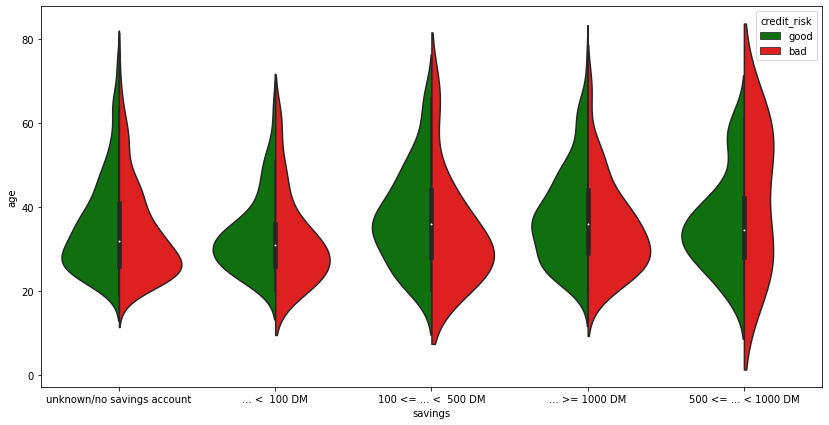

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


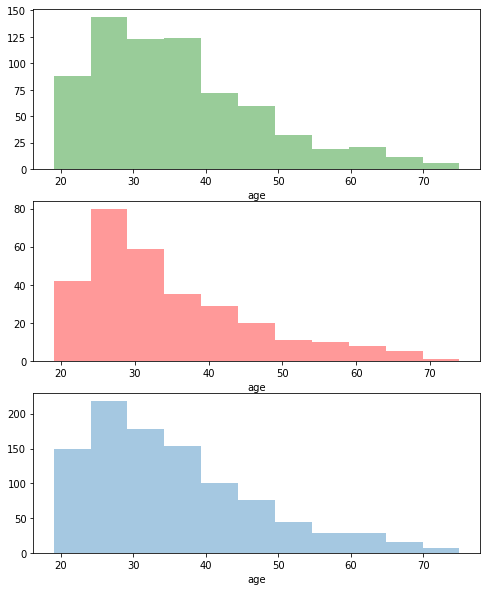

In [ ]:
plt.rcParams['figure.figsize']=(8,10)
fig,ax = plt.subplots(3, 1)
df = data.loc[data["credit_risk"] == "good"]
sns.distplot(df["age"], bins = 11, kde = False, ax = ax[0], color = "g")
df = data.loc[data["credit_risk"] == "bad"]
sns.distplot(df["age"], bins = 11, kde = False, ax = ax[1], color = "r")
df = data
sns.distplot(df["age"], bins = 11, kde = False, ax = ax[2])

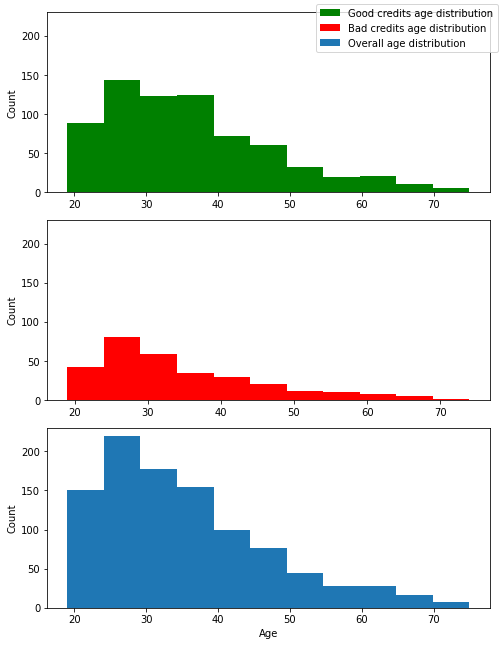

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


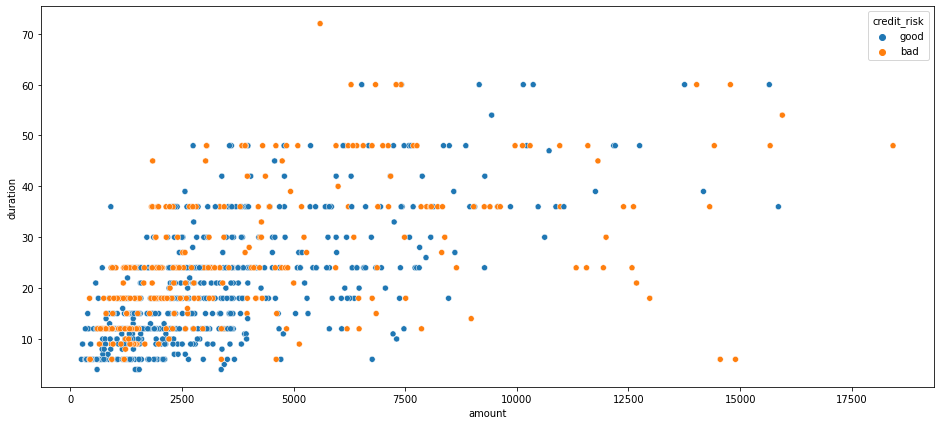

In [ ]:
plt.rcParams['figure.figsize']=(16,7)
sns.scatterplot(data["amount"], data["duration"], hue = data["credit_risk"])

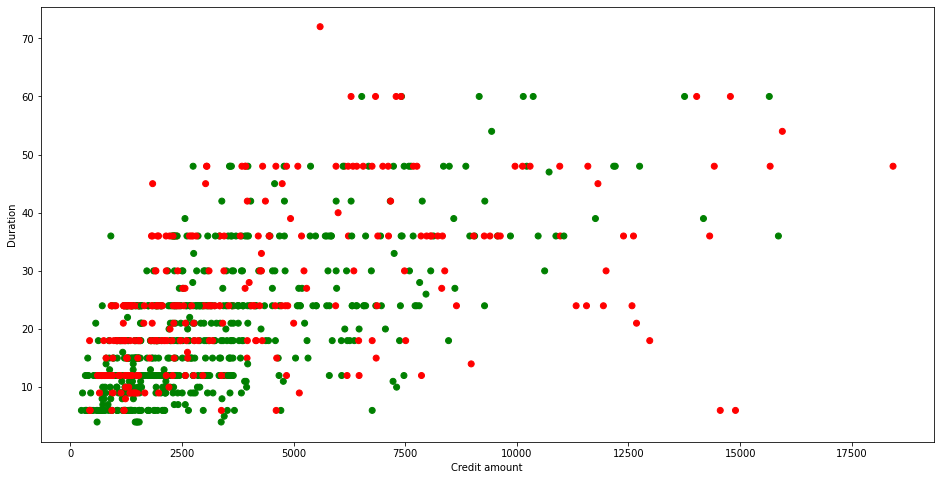

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

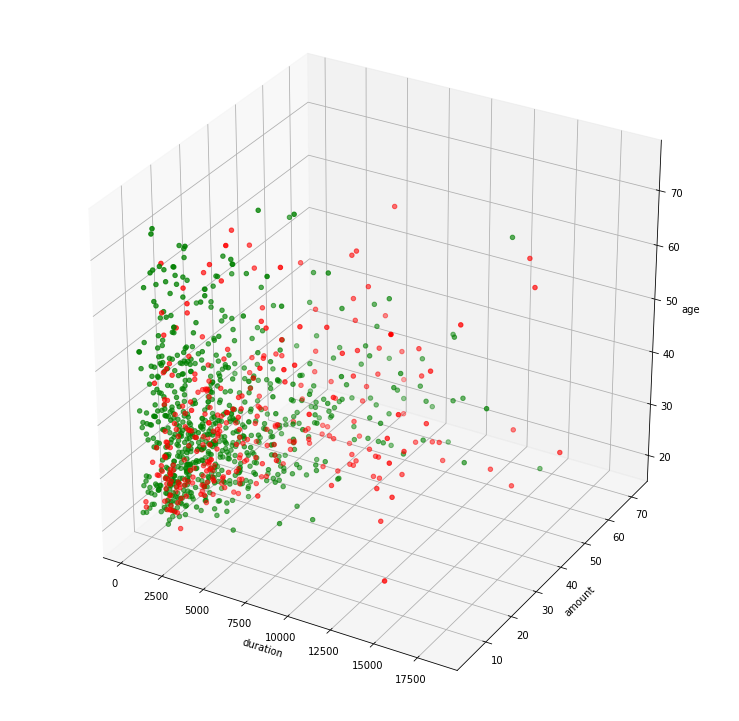

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection = '3d')

x = data["amount"]
y = data["duration"]
z = data["age"]

ax.scatter(x, y, z, c = ["g" if x == "good" else "r" for x in data["credit_risk"].values], marker = "o")
ax.set_xlabel("duration")
ax.set_ylabel("amount")
ax.set_zlabel("age")

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
from sklearn import preprocessing

In [ ]:
df = data.copy(deep = True)
df.drop(columns = ["credit_history", "purpose", "personal_status_sex", "other_debtors", "property", "other_installment_plans", "housing", "job"], inplace = True)

nots = ["duration", "age", "amount"]

for colum in df.columns:
  if colum not in nots:
    df[colum] = df.apply(preprocessing.LabelEncoder().fit_transform)[colum]

df

# Количественные признаки: duration, amount, age.
# Бинарные признаки: telephone, foreign_worker, credit_risk.
# Категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job.
# Порядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable.

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,3,18,1049,4,2,2,3,21,0,0,0,0,1
1,3,9,2799,4,0,1,0,36,1,1,0,0,1
2,0,12,841,0,1,1,3,23,0,0,0,0,1
3,3,12,2122,4,0,0,0,39,1,1,0,1,1
4,3,12,2171,4,0,2,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,1987,4,0,1,3,21,0,1,0,0,0
996,3,24,2303,4,3,2,2,45,0,0,0,0,0
997,1,21,12680,1,3,2,3,30,0,0,1,0,0
998,0,12,6468,1,4,1,2,52,0,0,1,0,0


In [ ]:
data = df
data

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,3,18,1049,4,2,2,3,21,0,0,0,0,1
1,3,9,2799,4,0,1,0,36,1,1,0,0,1
2,0,12,841,0,1,1,3,23,0,0,0,0,1
3,3,12,2122,4,0,0,0,39,1,1,0,1,1
4,3,12,2171,4,0,2,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,1987,4,0,1,3,21,0,1,0,0,0
996,3,24,2303,4,3,2,2,45,0,0,0,0,0
997,1,21,12680,1,3,2,3,30,0,0,1,0,0
998,0,12,6468,1,4,1,2,52,0,0,1,0,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def pred(Xtest: np.array):
  koef_age = -0.01
  if (Xtest[7] > 23 and Xtest[7] < 55):
    koef_age = -koef_age
  koef_stat = 0.3
  if (Xtest[0] == 3):
    koef_stat = -0.1
  if (Xtest[0] == 1 | Xtest[0] == 2):
    koef_stat = 1
  koef_sav = -0.1
  if (Xtest[3] == 1 | Xtest[3] == 2 | Xtest[3] == 3):
    koef_sav = 1
  res = 0.6 + Xtest[1] * -0.0045 + koef_age * Xtest[7] + koef_stat * Xtest[0] + koef_sav * Xtest[3]
  if (res > 0.5):
    return 1
  return 0
def predict(Xtest: np.array) -> np.array:
  res = []
  for i in Xtest:
    res.append(pred(i))
  return np.array(res)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


0.7